# AlphaFold. Geometria de las Proteinas

## Introducción
El problema del __plegamiento de proteínas__ se refiere a cómo las proteínas se presentan en sus formas finales y dicta su estructura tridimensional a partir de la secuencia de aminoácidos.

La secuencia de proteínas, el orden de los aminoácidos y las propiedades electromagnéticas de cada aminoácido determinan la forma final de las proteínas. Además, dado que hay 20 tipos diferentes de aminoácidos, la secuencia de proteínas se puede expresar simplemente como una combinación de 20 símbolos únicos.

El problema del plegamiento de proteínas se ha tratado con varios métodos __computacionales utilizando modelos basados en plantillas__ (basados en la idea de que secuencias similares conducen a estructuras similares), __enfoques de ensamblaje de fragmentos__, etc. En el último enfoque, una secuencia de proteínas objetivo se deconstruyó en pequeños fragmentos superpuestos, y la base de datos se examinó para identificar estructuras conocidas de secuencias de fragmentos similares que luego se ensamblan en una predicción de longitud completa. Aunque el último método demostró ser exitoso, se considera ineficiente ya que lleva demasiado tiempo de computación.

Aquí es donde aparecen los "__datos de covariación evolutiva__" y mejoran la precisión de las predicciones de estructura. AlphaFold 1 se define como un "método dependiente de la coevolución".

__Coevolución de proteínas__

Los puntos de contacto juegan un papel crucial en el mantenimiento de la estructura 3D general de las proteínas. Las interacciones electroquímicas de un __par de aminoácidos forman estos puntos de contacto__. Sin embargo, la mutación puede ocurrir y cambiar uno de estos aminoácidos durante la evolución, y en consecuencia cambiar la estructura y función de la proteína. Es por eso que, en general, cuando uno de estos aminoácidos se modifica, el otro par también se ajusta para mantener propiedades electromagnéticas similares que mantendrán la forma de la proteína sin cambios. En esta situación, decimos que un par de aminoácidos __coevolucionaron__. Después de un reemplazo, la coevolución tiende a equilibrar la proteína al cambio.

si desea buscar interacciones de aminoácidos relevantes que contribuyan a la estructura (y función) de las proteínas, debe buscar pares de aminoácidos que hayan coevolucionado.

La covariación de aminoácidos se puede encontrar analizando un gran número de bases de datos de secuencias. La __alineación de secuencias múltiples o programas MSA__ se utilizan para alinear varias secuencias de aminoácidos de familias de proteínas de diferentes especies y examinar la correlación entre los aminoácidos. Este análisis informa la correlación en pares de posiciones que pueden contribuir a la forma de la proteína.

AlphaFold no solo busca el punto de contacto, sino que predice la __distancia entre los aminoácidos__ en una proteína y la __distribución de probabilidad__ de la distancia predicha.

En la siguiente imagen del artículo AlphaFold 1 ({cite:p}`senior2020improved`) se puede ver que cada píxel en el mapa de distancia representa una distribución de probabilidad. DeepMind, la empresa desarrolladora de AlphaFold, llama a esto un distograma. En concreto es el __distograma de la proteina CASP T0955__ (longitud = 41):

<img src="images/alphafold_net2.png" width="550px">

- __(a)__ Estructura nativa que muestra distancias inferiores a 8 $\mathring{A}$ desde $C_{\beta}$ del residuo 29.
- __(b)__ Distancia de inter-residuos nativos.
- __(c)__ La moda de las predicciones de distancia, resaltando el residuo 29.
- __(d)__ Las distribuciones de probabilidad previstas para las distancias del residuo 29 a todos los demás residuos.

Puede verse que las modas de la distribución (c) coinciden estrechamente con las distancias reales (b). 

__AlphaFold 1__ representa estructuras 3D como un __par de ángulos de torsión entre aminoácidos__. Incluso cuando una proteína está en un estado plegado, los bloques básicos, la estructura del aminoácido permanece sin cambios. Sin embargo, el ángulo de torsión entre un aminoácido y el otro cambia. AlphaFold calcula la __distribución de probabilidad de los ángulos de torsión__ de los aminoácidos. 

<img src="images/alphafold_net4.png" width="500px">

En el __primer paso__, AlphaFold 1 recibe datos y secuencia de aminoácidos de una proteína objetivo y entrena una red convolucional (con conjunto de datos PDB) para encontrar:
1. El __distograma__ de la proteína 
2. La distribución de probabilidad del ángulo de __torsión__.

<img src="images/alphafold_net5.png" width="500px">

En el __segundo paso__, AlphaFold 1 ejecuta una iteración de __gradiente descenso de la función potencial__ de la proteina.

Construye una __función potencial específicia__ 

$$V(\phi,\psi)=V_{distance}(\phi,\psi)+V_{torsion}(\phi,\psi)+V_{score2-smooth}(\phi,\psi)$$

A partir de:

1. __Potencial de distancia__($V_{distance}(\phi,\psi)$): cruzando los angulos de torsión y el distograma predicho por la red convolucional.
2. __Potencial geométrico__($V_{torsion}(\phi,\psi)$): cruzando la estructura predicha inicialmente y distribución de torsión.
3. __Potencial suave__($V_{score2-smooth}(\phi,\psi)$): La estructura de aminoácidos tiene una estructura de columna vertebral y cadenas laterales. Sin embargo, cuando AlphaFold 1 predice la estructura inicial, se hace utilizando solo la estructura de la columna vertebral, y no se considera si existe o no una cadena lateral. Por lo tanto, AlphaFold incorpora el término __Van der Waals__ para evitar choques estéricos, porque los residuos no chocan entre sí. Esto se conoce como el __potencial suave__.

<img src="images/alphafold_net6.png" width="700px">

El __último paso__ es encontrar por iteración una solución óptima que minimice la función potencial correspondiente. AlphaFold 1 utiliza la minimización del __descenso de gradiente__ para obtener estructuras de proteínas bien empaquetadas. La estructura de __menor potencial__ se almacena como la __mejor solución__ de la iteración como una de las respuestas esperadas.

Si solo confía en la estructura inicial, puede caer en mínimos locales, por lo que también se agregará __ruido__. El valor óptimo de esa iteración también se almacena como una respuesta esperada.

<img src="images/alphafold_net7.png" width="400px">

La predicción de la estructura de proteínas tiene como objetivo determinar la forma tridimensional de una proteína a partir de su secuencia de aminoácidos. En 2018 __AlphaFold 1__ ({cite:p}`senior2020improved`) participó junto a 97 grupos en una competición bienal para predecir la estructura de 84 secuencias de proteinas cuya estructura se determinó experimentalmente.

Dividieron las proteinas en 104 dominios y clasificaron cada uno como supceptible al modelado basado en plantillas (TBM), modelado libre (FM) o intermedio (TBM/FM). AlphaFold predijo más dominios FM con alta precisión que cualquier otro sistema. 

<img src="images/alphafold_net1.png" width="700px">

El proceso de plegado para el objetivo de CASP13 identificado como __T0986s2__ (cuya longitud es L=155) es:

- __(a)__ Pasos de la predicción de estructuras.
- __(b)__ La red neuronal predice todo el distograma __LxL__ en función de las características de MSA, acumulando predicciones separadas para residuos 64x64
- __(c)__ Iteración de gradiente descenso (1200 pasos) con la puntuación TM y RMSD graficadas contra el número de pasos. También se muestra la estructura secundaria (de SST30) (hélice en azul, hebra en rojo) junto con la estructura secundaria nativa (SS), las probabilidades de predicción de la estructura secundaria de la red y la incertidumbre en las predicciones del ángulo de torsión ($K^{-1}$ de la distribución de von Mises).
- __(d)__ muestra la primera presentación final superpuesta a la estructura nativa (en gris).
- __(e)__ muestra el puntaje TM promedio (a través del conjunto de prueba, n = 377) de la estructura de potencial más bajo contra el número de repeticiones de descenso de gradiente (escala logarítmica).

El componente central de AlphaFold es una red neuronal convolucional que se entrena en estructuras PDB para 
predecir las distancias $d_{ij}$ entre los átomos de $C_{\beta}$ de los pares, $ij$, de los 96 residuos de una proteína. Basado en una representación de la secuencia de aminoácidos de la proteína, $\mathcal{S}$, y características derivadas de la secuencia MSA, la red, de estructura similar a las utilizadas para el reconocimiento de imágenes, predice una distribución de probabilidad discreta $P(d_{ij} | \mathcal{S}, MSA(\mathcal{S}))$ para cada par $ij$ en una región de residuos de 64x64.

El conjunto completo de predicciones de distribución de distancia se construye promediando predicciones para regiones superpuestas y se denomina __distograma__ ("_histograma de distancias_").

Para realizar estructuras que se ajusten a las predicciones de distancia, se contruye una $V_{distancia}$ de potencial suave, ajustando un sp-line a las probabilidades logarítmicas negativas y sumando todos los pares de residuos. Se parametrizan las estructuras proteicas por los ángulos de torsión del esqueleto $(\phi, \psi)$ de todos los residuos y se construye una función diferenciable de la geometría de la proteina $x=G(\phi, \psi)$ para calcular las coordenadas de $C_{\beta}$, $x$, y sus distancias inter-residuo, $d_{ij}=|x_i-x_j|$, para cada estructura, y expresar $V_{distancia}$ como una función de $\phi$ y $\psi$.

Para una proteína con $L$ residuos, este potencial acumula $L^2$ términos de predicciones de distribución marginal, donde $L$ es la longitud de la proteina.

La distribución de referencia modela las distribuciones de distancia $P(d_{ij} | L)$ independientemente de la secuencia de la proteína y se calcula entrenando una versión pequeña de la red neuronal con las predicciones de la distancia en las mismas estructuras, sin características de entrada de secuencia o __MSA__.

Se entrena una cabecera de salida separada de la red de predicción de contacto para predecir distribuciones de probabilidad discretas de los ángulos de torsión de la columna vertebral $P(\phi_i, \psi_j | S, MSA(S))$. Después de ajustar una distribución de von Mises, esto se usa para agregar un término de modelado de torsión suave $V_{torsion}$ al potencial:

$$V_{torsion} = - \displaystyle\sum log p_{vonMises} (\phi_i, \psi_j | S, MSA(S)) $$

Finalmente, para evitar choques estéricos, se agrega el $V_{score2-suave}$ de Rosetta al potencial, ya que incorpora un término de van der Waals. 

{cite:p}`senior2020improved` proporcionan un código ejecutado con la arquitectura Tensorflow que permite predecir proteinas estructuradas en CASP13. Es la versión oficial inicial o __AlphaFold 1__, el enlace es:

https://github.com/deepmind/deepmind-research/tree/master/alphafold_casp13

Una __versión 2__ se encuentra en:

https://github.com/deepmind/alphafold

Hemos utilizado una versión de  __AlphaFold 1 en PyTorch__, con las adaptaciones necesarias a Jupyter. Que puede ejecutarse tanto en CPU, como GPU:

https://github.com/Urinx/alphafold_pytorch

Únicamente la función de lectura de ficheros TFREC (__tfrec_read__) está sin migrar a PyTorch y requiere de la instalación de TensorFlow.

No aparece publicada la función de pérdida, por lo que no es posible construir el modelo de entrenamiento. Por contra {cite:p}`senior2020improved` proporcionan los modelos entrenados en:

http://bit.ly/alphafold-casp13-weights

### Alcance del cuaderno

El alcance del cuaderno es una versión abreviada del código abierto que muestran los autores de __AlphaFold 1__, donde únicamente se modela el __primer paso del algoritmo hasta obtener los distogramas__. 

Esta versión abreviada se ciñe a la rutina __run_eval__ de https://github.com/deepmind/deepmind-research/tree/master/alphafold_casp13, no implementado la ejecución ensamblada contra varias que aparece en __run_ensamble__

In [1]:
import os
import numpy as np
import itertools
import math, random
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from pathlib import Path

In [2]:
googleColaboratory=False
modoEvaluacion=False

In [3]:
if googleColaboratory:
    from google.colab import drive
    drive.mount('/content/drive/')
path = Path("/content/drive/MyDrive/Colab Notebooks/data/alphafold") if googleColaboratory else Path("./data/alphafold")
print(path.absolute())

C:\Users\valer_z\Proyectos Python\Cuadernos clase AA\data\alphafold


## Creación de Datasets y Dataloaders

### Definición de las características del modelo

El modelo incorpora las siguientes características:

- __aatype__ : Una codificación activa de tipos de aminoácidos. La asignación es ARNDCQEGHILKMFPSTWYVX -> rango (21). 
- __alpha_mask__ : Máscara para alpha_positions.
- __alpha_positions__ : (x, y, z) Coordenadas alfa de carbono.
- __beta_mask__ : Máscara para beta_positions.
- __beta_positions__ : (x, y, z) Coordenadas beta de carbono.
- __between_segment_residues__ : El número de residuos entre segmentos (BSR) en la siguiente posición. P.ej. ABCXXD (XX es BSR) sería [0,0,2,0].
- __chain_name__ : El nombre de la cadena. P.ej. 'A', 'B', ...
- __deletion_probability__ : La fracción de secuencias que tuvieron una eliminación en esta posición. 
- __domain_name__ :  El nombre de dominio.
- __gap_matrix__ : (NR, NR, 1) Señal de covariación de los estados separados, esto da una indicación de la varianza inducida debido a los estados separados.
- __hhblits_profile__ : float32 (NR, 22) Un perfil (distribución de probabilidad sobre tipos de aminoácidos) calculado usando HHBlits MSA. Codificación: 20 aminoácidos + 'X' + '-'.
- __hmm_profile__ : (NR, 30) El perfil HHBlits HHM (del archivo de salida -ohhm HHBlits). Los asteriscos en la salida se reemplazan por 0.0.
- __key__ : La identificación única de la proteína.
- __mutual_information__ : (NR, NR, 1) La información mutua corregida del producto promedio. Ver https://doi.org/10.1093/bioinformatics/btm604.
- __non_gapped_profile__ : (NR, 21) Un perfil solo de aminoácidos (descontando espacios). 
- __num_alignments__ : (NR, 1) El número de alineaciones de secuencias múltiples de HHBlits. Tiene que ser repetido NR veces.
- __num_efective_alignments__ : El número de alineaciones efectivas (neff al 62 % de similitud de secuencia).
- __phi_angles__ : (NR, 1) Los ángulos phi.
- __phi_mask__ : (NR, 1) Máscara para phi_angles.
- __perfil__ : (NR, 21) Un perfil (distribución de probabilidad sobre tipos de aminoácidos) calculado usando PSI-BLAST. Equivalente a la salida de ChkParse.
- __profile_with_prior__ : (NR, 22) Un perfil calculado usando HHBlits que tiene en cuenta las previas y la matriz Blosum. Ver ecuación 5 en https://doi.org/10.1093/nar/25.17.3389.
- __profile_with_prior_without_gaps__ : (NR, 21) Igual que profile_with_prior pero sin espacios incluidos.
- __pseudo_bias__ : (NR, 22) El sesgo calculado en el cálculo de pseudoverosimilitud de MSA.
- __pseudo_frob__ : (NR, NR, 1) Norma de pseudoverosimilitud de Frobenius (brechas no incluidas). Similar a la salida de CCMPred.
- __pseudolikelihood__ : (NR, NR, 484) Los pesos calculados en el cálculo de pseudoverosimilitud de MSA.
- __psi_angles__ : (NR, 1) Los ángulos psi.
- __psi_mask__ : (NR, 1) Máscara para psi_angles.
- __residuo_index__ : (NR, 1) Índice de cada residuo de 0 a NR - 1. Ver más abajo.
- __resolution__ : La resolución de la estructura de la proteína.
- __reweighted_profile__ : (NR, 22) Perfil donde las secuencias se vuelven a ponderar para ponderar más las secuencias más raras. Vea abajo.
- __sec_structure__ : (NR, 8) Estructura secundaria generada por DSSP y codificada one-hot por el mapeo -HETSGBI -> range(8).
- __sec_structure_mask__ : (NR, 1) Máscara para sec_structure_mask.
- __seq_length__ : (NR, 1) La longitud de la secuencia de aminoácidos. Tiene que ser repetido NR veces. Vea abajo.
- __sequence__ : La secuencia de aminoácidos (codificación de aminoácidos de 1 letra). Vea abajo.
- __solv_surf__ : (NR, 1) Área relativa accesible al solvente calculada usando DSSP y luego normalizada por la accesibilidad máxima de aminoácidos.
- __solv_surf_mask__ : (NR, 1) Máscara para solv_surf.
- __superfamily__ : El código CATH de la superfamilia.

Para más detalle:


https://github.com/deepmind/deepmind-research/blob/master/alphafold_casp13/README.md


In [4]:
import json
import pickle
import collections
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset

NUM_RES = None
FEATURES = {
    'aatype': ('float32', [NUM_RES, 21]),
    'alpha_mask': ('int64', [NUM_RES, 1]),
    'alpha_positions': ('float32', [NUM_RES, 3]),
    'beta_mask': ('int64', [NUM_RES, 1]),
    'beta_positions': ('float32', [NUM_RES, 3]),
    'between_segment_residues': ('int64', [NUM_RES, 1]),
    'chain_name': ('string', [1]),
    'deletion_probability': ('float32', [NUM_RES, 1]),
    'domain_name': ('string', [1]),
    'gap_matrix': ('float32', [NUM_RES, NUM_RES, 1]),
    'hhblits_profile': ('float32', [NUM_RES, 22]),
    'hmm_profile': ('float32', [NUM_RES, 30]),
    'key': ('string', [1]),
    'mutual_information': ('float32', [NUM_RES, NUM_RES, 1]),
    'non_gapped_profile': ('float32', [NUM_RES, 21]),
    'num_alignments': ('int64', [NUM_RES, 1]),
    'num_effective_alignments': ('float32', [1]),
    'phi_angles': ('float32', [NUM_RES, 1]),
    'phi_mask': ('int64', [NUM_RES, 1]),
    'profile': ('float32', [NUM_RES, 21]),
    'profile_with_prior': ('float32', [NUM_RES, 22]),
    'profile_with_prior_without_gaps': ('float32', [NUM_RES, 21]),
    'pseudo_bias': ('float32', [NUM_RES, 22]),
    'pseudo_frob': ('float32', [NUM_RES, NUM_RES, 1]),
    'pseudolikelihood': ('float32', [NUM_RES, NUM_RES, 484]),
    'psi_angles': ('float32', [NUM_RES, 1]),
    'psi_mask': ('int64', [NUM_RES, 1]),
    'residue_index': ('int64', [NUM_RES, 1]),
    'resolution': ('float32', [1]),
    'reweighted_profile': ('float32', [NUM_RES, 22]),
    'sec_structure': ('int64', [NUM_RES, 8]),
    'sec_structure_mask': ('int64', [NUM_RES, 1]),
    'seq_length': ('int64', [NUM_RES, 1]),
    'sequence': ('string', [1]),
    'solv_surf': ('float32', [NUM_RES, 1]),
    'solv_surf_mask': ('int64', [NUM_RES, 1]),
    'superfamily': ('string', [1]),
}
Protein = collections.namedtuple('Protein', ['len', 'seq', 'inputs_1d', 'inputs_2d', 'inputs_2d_diagonal', 'scalars', 'targets'])

### Lectura de los ficheros tfrec, pkl y config

La función __tfrec_read__ necesita la librería TensorFlow.

In [5]:
#!pip install tensorflow

In [6]:
def tfrec_read(tfrec_file):
    import tensorflow as tf
    import os
    os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

    features = [
        'aatype',
        'beta_mask',
        'beta_positions',
        'between_segment_residues',
        'chain_name',
        'deletion_probability',
        'domain_name',
        'gap_matrix',
        'hhblits_profile',
        'hmm_profile',
        'non_gapped_profile',
        'num_alignments',
        'num_effective_alignments',
        'profile',
        'profile_with_prior',
        'profile_with_prior_without_gaps',
        'pseudo_bias',
        'pseudo_frob',
        'pseudolikelihood',
        'residue_index',
        'resolution',
        'reweighted_profile',
        'sec_structure',
        'sec_structure_mask',
        'seq_length',
        'sequence',
        'solv_surf',
        'solv_surf_mask',
        'superfamily'
    ]
    features = {name: FEATURES[name] for name in features}

    def parse_tfexample(raw_data, features):
        feature_map = {k: tf.io.FixedLenSequenceFeature(shape=(), dtype=eval(f'tf.{v[0]}'), allow_missing=True) for k, v in features.items()}
        parsed_features = tf.io.parse_single_example(raw_data, feature_map)
        num_residues = tf.cast(parsed_features['seq_length'][0], dtype=tf.int32)

        for k, v in parsed_features.items():
            new_shape = [num_residues if s is None else s for s in FEATURES[k][1]]

            assert_non_empty = tf.assert_greater(tf.size(v), 0, name=f'assert_{k}_non_empty',
                message=f'The feature {k} is not set in the tf.Example. Either do not '
                'request the feature or use a tf.Example that has the feature set.')
            with tf.control_dependencies([assert_non_empty]):
                parsed_features[k] = tf.reshape(v, new_shape, name=f'reshape_{k}')

        return parsed_features

    raw_dataset = tf.data.TFRecordDataset([tfrec_file])
    raw_dataset = raw_dataset.map(lambda raw: parse_tfexample(raw, features))
    return raw_dataset




In [7]:
def tfrec2pkl(dataset, pkl_file):
    datalist = []
    dataset = dataset.batch(1)
    for x in dataset:
        data = {}
        for k, v in x.items():
            if k in ['sequence', 'domain_name', 'chain_name', 'resolution', 'superfamily', 'num_effective_alignments']:
                # print(f"{k}: {v.numpy()[0,0].decode('utf-8')}")
                if v.numpy().dtype == 'O':
                    data[k] = v.numpy()[0,0].decode('utf-8')
                else:
                    data[k] = v.numpy()[0,0]
            else:
                # print(k, v.numpy().shape)
                data[k] = v.numpy()[0]
        datalist.append(data)

    with open(pkl_file, 'wb') as f:
        pickle.dump(datalist, f)

    return datalist

In [8]:
from collections import namedtuple

def build_config(model_path, replica):
    #config_file = model_path / replica / 'config.json'
    config_file = os.path.join(model_path, str(replica), 'config.json')
    #stats_file = model_path / 'stats_train_s35.json'
    stats_file = os.path.join(model_path,'stats_train_s35.json')
    with open(config_file, 'r') as f:
        config = json.load(f)
    with open(stats_file, 'r') as f:
        norm_stats = json.load(f)

    default = {
        'torsion_multiplier': 0, 'collapsed_batch_norm': False,
        'filters_1d': [], 'is_ca_feature': False,
    }
    config['norm_stats'] = norm_stats
    config['network_config'] = {**default, **config['network_config']}
    exclude = norm_stats.keys()

    def make_nt(d, n):
        return namedtuple(n, d.keys())(**{k: make_nt(v, k) if isinstance(v, dict) and k not in exclude else v for k,v in d.items()})

    return make_nt(config, 'config')

In [9]:
def save_seq_prob(prob, seq, out_file):
    SECONDARY_STRUCTURES = '-HETSGBI'
    if len(prob.shape) == 1:
        prob = prob.reshape(-1,1)
    L, n = prob.shape
    label = 'asa' if n == 1 else 'secstruct'

    with out_file.open('w') as f:
        f.write(f"# LABEL {label} CLASSES [{''.join(SECONDARY_STRUCTURES[:n])}]\n\n")
        for i in range(L):
            ss = SECONDARY_STRUCTURES[prob[i].argmax()]
            f.write(f"{i+1:4d} {seq[i]:1s} {ss:1s} {''.join(['%6.3f'%p for p in prob[i]])}\n")

### Dibujo de distogramas

Se dibujan los distogramas del modelo

In [10]:
def plot_contact_map(target, mats, out):
    import matplotlib.pyplot as plt
    if len(mats) == 1:
        fig, ax = plt.subplots()
        axs = [ax]
    else:
        fig, axs = plt.subplots(1, len(mats), figsize=(11*len(mats),8))
    fig.subplots_adjust(wspace=0)

    for i, mat in enumerate(mats):
        if len(mat.shape) == 3 and mat.shape[-1] == 64:
            vmax = mat.shape[-1] - 1
            mat = mat.argmax(-1)
            im = axs[i].imshow(mat, cmap=plt.cm.Blues_r, vmin=0, vmax=vmax)
            cb = fig.colorbar(im, ax=axs[i])
            cb.set_ticks(np.linspace(0, vmax, 11))
            cb.set_ticklabels(range(2, 23, 2))
            if len(mats) != 1:
                axs[i].set_title('distance', fontsize=20)
        else:
            im = axs[i].imshow(mat, cmap=plt.cm.Blues, vmin=0, vmax=1)
            cb = fig.colorbar(im, ax=axs[i])
            if len(mats) != 1:
                axs[i].set_title('contact', fontsize=20)

    if len(mats) == 1:
        plt.title(target)
        plt.savefig(out, dpi=300)
    else:
        fig.suptitle(target, fontsize=20)
        plt.savefig(out, dpi=300, bbox_inches='tight', pad_inches=0.5)

### Función de carga de datos (Dataset)

Desde los ficheros se obtiene el __Dataset__, una estructura de tensores con los datos de entrada

El __dataset__ es un objeto (creado con una clase de usuario) de conjunto de datos desde el que cargar datos. PyTorch admite dos tipos diferentes de conjuntos de datos:

- __map-style__ datasets,
- __iterable-style__ datasets.

El dataset __Map-style__ es un conjunto de datos de estilo mapa, que está implementado con los protocolos __getitem__() y __len__() , y representa un mapa de índices / claves (posiblemente no integrales) a muestras de datos.

Por ejemplo, accediendo con dataset[idx] , podría leer la imagen idx-th y su etiqueta correspondiente de una carpeta en el disco.

In [11]:
def load_data(data_file, model_path, replica):
    if data_file.endswith('.tfrec'):
        raw_dataset = tfrec_read(data_file)
        raw_dataset = tfrec2pkl(raw_dataset, data_file[:-5]+'pkl')
    else:
        raw_dataset = np.load(data_file, allow_pickle=True)
    
    config = build_config(model_path, replica)

    def normalize(data):
        #print("config", config)
        feature_normalization = {k: config.feature_normalization for k in config.network_config.features if k not in config.normalization_exclusion}
        copy_unnormalized = list(set(config.network_config.features) & set(config.network_config.targets))
        
        for k in copy_unnormalized:
            if k in data: data[f'{k}_unnormalized'] = data[k]
        
        range_epsilon = 1e-12
        for k, v in data.items():
            if k not in feature_normalization or feature_normalization[k] == 'none': pass
            elif feature_normalization[k] == 'std':
                train_range = np.sqrt(np.float32(config.norm_stats.var[k]))
                v = v - np.float32(config.norm_stats.mean[k])
                v = v / train_range if train_range > range_epsilon else v
                data[k] = v
            else:
                raise ValueError(f'Unknown normalization mode {feature_normalization[k]} for feature {k}.')

        return data

    dataset = [normalize(data) for data in raw_dataset]

    def convert_to_input(data):
        tensors_1d = []
        tensors_2d = []
        tensors_2d_diagonal = []
        L = len(data['sequence'])

        desired_features = config.network_config.features
        desired_scalars = config.network_config.scalars
        desired_targets = config.network_config.targets

        for k in desired_features:
            dim = len(FEATURES[k][1]) - 1
            if dim == 1:
                tensors_1d.append(np.float32(data[k]))
            elif dim == 2:
                if k not in data:
                    if not(f'{k}_cropped' in data and f'{k}_diagonal' in data):
                      raise ValueError(
                          f'The 2D feature {k} is not in the features dictionary and neither are its cropped and diagonal versions.')
                    else:
                      tensors_2d.append(np.float32(data[f'{k}_cropped']))
                      tensors_2d_diagonal.append(np.float32(data[f'{k}_diagonal']))
                else:
                    tensors_2d.append(np.float32(data[k]))

        inputs_1d = np.concatenate(tensors_1d, -1)
        if config.network_config.is_ca_feature:
            # The background model is not conditioned on the sequence
            # a binary feature δαβ to indicate whether the residue is a glycine (Cα atom) or not (Cβ)
            inputs_1d = inputs_1d[:, 7:8]
        inputs_2d = np.concatenate(tensors_2d, -1) if tensors_2d else np.zeros((L, L, 0), dtype=np.float32)
        
        if tensors_2d_diagonal:
            diagonal_crops1 = [t[:, :, :(t.shape[2] // 2)] for t in tensors_2d_diagonal]
            diagonal_crops2 = [t[:, :, (t.shape[2] // 2):] for t in tensors_2d_diagonal]
            inputs_2d_diagonal = np.concatenate(diagonal_crops1 + diagonal_crops2, 2)
        else:
            inputs_2d_diagonal = inputs_2d

        scalars = collections.namedtuple('ScalarClass', desired_scalars)(*[data.get(f'{k}_unnormalized', data[k]) for k in desired_scalars])
        targets = collections.namedtuple('TargetClass', desired_targets)(*[data.get(f'{k}_unnormalized', data[k]) for k in desired_targets])

        p = Protein(
            len=len(data['sequence']),
            seq=data['sequence'],
            inputs_1d=inputs_1d,
            inputs_2d=inputs_2d,
            inputs_2d_diagonal=inputs_2d_diagonal,
            scalars=scalars,
            targets=targets
        )
        return p

    dataset = [convert_to_input(data) for data in dataset]
    return dataset



In [12]:
class ProteinDataset(Dataset):
    def __init__(self, fname, model_path, replica):
        super().__init__()
        self.dataset = load_data(fname, model_path, replica)

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, index):
        return self.dataset[index]

El resultado que se obtiene en el __dataset__ es un objeto __Protein__ con los siguientes atributos:

- __len__: número entero con la longitud de la secuencia de aminoacidos de la proteina
- __seq__: secuencia de las letras de los aminoacidos de la proteina..
- __inputs_1d__
- __inputs_2d__:
- __inputs_2d_diagonal__:
- __scalars__: objeto con valores __num_effective_alignments__ y __resolution__.
- __targets__: objeto con arrays __sec_structure__, __sec_structure_mask__, __solv_surf__, __solv_surf_mask__, __beta_positions__, __beta_mask__, __num_alignments__, __profile__, __residue_index__ y __between_segment_residues__ y variables __domain_name__, __chain_name__, __superfamily__ y __resolution__

In [13]:
def feature_1d_to_2d(x_1d, res_idx, L, crop_x, crop_y, crop_size_x, crop_size_y, binary_code_bits):
    res_idx = np.int32(res_idx)
    n_x, n_y = crop_size_x, crop_size_y
    range_scale = 100.0
    x_1d_y = np.pad(
        x_1d[max(0, crop_y[0]):crop_y[1]],
        [[max(0, -crop_y[0]), max(0, n_y - (L - crop_y[0]))],
        [0, 0]]
    ) # LxD
    range_n_y = np.pad(
        res_idx[max(0, crop_y[0]):crop_y[1]],
        [max(0, -crop_y[0]), max(0, n_y - (L - crop_y[0]))]
    ) # L
    x_1d_x = np.pad(
        x_1d[max(0, crop_x[0]):crop_x[1]], 
        [[max(0, -crop_x[0]), max(0, n_x - (L - crop_x[0]))],
        [0, 0]]
    ) # LxD
    range_n_x = np.pad(
        res_idx[max(0, crop_x[0]):crop_x[1]],
        [max(0, -crop_x[0]), max(0, n_x - (L - crop_x[0]))]
    ) # L

    offset = np.float32(np.expand_dims(range_n_x, 0) - np.expand_dims(range_n_y, 1)) / range_scale # LxL
    position_features = [
        np.tile(
            np.reshape((np.float32(range_n_y) - range_scale) / range_scale, [n_y, 1, 1]),
            [1, n_x, 1]
        ),
        np.reshape(offset, [n_y, n_x, 1])
    ]

    if binary_code_bits:
        exp_range_n_y = np.expand_dims(range_n_y, 1)
        bin_y = np.concatenate([exp_range_n_y // (1 << i) % 2 for i in range(binary_code_bits)], 1)
        exp_range_n_x = np.expand_dims(range_n_x, 1)
        bin_x = np.concatenate([exp_range_n_y // (1 << i) % 2 for i in range(binary_code_bits)], 1)
        position_features += [
            np.tile(
                np.expand_dims(np.float32(bin_y), 1),
                [1, n_x, 1],
            ),
            np.tile(
                np.expand_dims(np.float32(bin_x), 0),
                [n_y, 1, 1],
            )
        ]

    augmentation_features = position_features + [
        np.tile(
            np.expand_dims(x_1d_x, 0),
            [n_y, 1, 1]
        ),
        np.tile(
            np.expand_dims(x_1d_y, 1),
            [1, n_x, 1]
        )
    ]
    augmentation_features = np.concatenate(augmentation_features, -1)
    return augmentation_features

In [14]:
def make_crops(inputs_1d, inputs_2d, L, res_idx, crop_size_x, crop_step_x, crop_size_y, crop_step_y, binary_code_bits):
    for i in range(-crop_size_x // 2, L - crop_size_x // 2, crop_step_x):
        for j in range(-crop_size_y // 2, L - crop_size_y // 2, crop_step_y):
            '''
            start                                                   end
            |                                                       |
            i              crop_size_x               end_x          i                                        end_x
            |----------------------------------------|              |----------------------------------------|
            ....................KVEPVGNAYGHWTKHGKEFPEYQNAKQYVDAAHNFMTNPPLTNPPPGTLTKTRPNGD.....................
            |___________________|________________________________________|              |____________________|
                  prepad_x      0              crop_size_x                              L      postpad_x
                                ic
            '''
            end_x = i + crop_size_x
            end_y = j + crop_size_y
            crop_x = np.array([i, end_x], dtype=np.int32)
            crop_y = np.array([j, end_y], dtype=np.int32)
            ic = max(0, i)
            jc = max(0, j)
            end_x_cropped = min(L, end_x)
            end_y_cropped = min(L, end_y)
            prepad_x = max(0, -i)
            prepad_y = max(0, -j)
            postpad_x = end_x - end_x_cropped
            postpad_y = end_y - end_y_cropped

            cyx = np.pad(
                inputs_2d[jc:end_y, ic:end_x, :],
                [[prepad_y, postpad_y],
                [prepad_x, postpad_x],
                [0, 0]]
            )
            assert cyx.shape[0] == crop_size_y
            assert cyx.shape[1] == crop_size_x

            cxx = inputs_2d[ic:end_x, ic:end_x, :]
            if cxx.shape[0] < cyx.shape[0]:
                cxx = np.pad(cxx,
                    [[prepad_x, max(0, i + crop_size_y - L)],
                    [prepad_x, postpad_x],
                    [0, 0]]
                )
            assert cxx.shape[0] == crop_size_y
            assert cxx.shape[1] == crop_size_x

            cyy = inputs_2d[jc:end_y, jc:end_y, :]
            if cyy.shape[1] < cyx.shape[1]:
                cyy = np.pad(cyy,
                    [[prepad_y, postpad_y],
                    [prepad_y, max(0, j + crop_size_x - L)],
                    [0, 0]]
                )
            assert cyy.shape[0] == crop_size_y
            assert cyy.shape[1] == crop_size_x

            augmentation_features = feature_1d_to_2d(inputs_1d, res_idx, L, crop_x, crop_y, crop_size_x, crop_size_y, binary_code_bits) # LxLxD1
            x_2d = np.concatenate([cyx, cxx, cyy, augmentation_features], -1) # LxLx(3D2+D1)
            yield x_2d, crop_x, crop_y

def collate_fn(batch, config):
    assert len(batch) == 1
    protein = batch[0]
    crops = make_crops(protein.inputs_1d,
                       protein.inputs_2d,
                       protein.len,
                       protein.targets.residue_index.flatten(),
                       config.crop_size_x,
                       config.crop_size_x // config.eval_config.crop_shingle_x,
                       config.crop_size_y,
                       config.crop_size_y // config.eval_config.crop_shingle_y,
                       config.network_config.binary_code_bits)
    return protein, crops

En el momento de construir el __dataloader__ se asigna la función __collate_fn__ desde el constructor del objeto __DataLoader__.

En el momento que se recuperan las proteinas se ejecuta la función __collate_fn__ se generan los cultivos (__crops__) asociados a cada proteina.

In [15]:
def ProteinDataLoader(target_file, model_path, replica):
    dataset = ProteinDataset(target_file, model_path, replica)
    config = build_config(model_path, replica)
    dataloader = DataLoader(dataset, batch_size=1, collate_fn=lambda b: collate_fn(b, config))
    return dataloader

### Se cargan los datos disponibles

Una versión completa de la base de datos __CASP13__ se encuentra en  (45 GB en ZIP):

http://bit.ly/alphafold-casp13-data

En el aparecen 72 estructuras de proteinas, denominadas de acuerdo al nombre del subdirectorio, desde __T0949__, __T0953s1__, __...__, hasta __T1022s2__. Así los __IDs de las proteinas__ serán: __{T0949, T0953s1. ..., T1022s2}__.

En cada uno de los subdirectorios aparece un fichero de con nombre el __ID__ y extensión __tfrec__ y un subdirectorio __contacts__ que tiene dos ficheros de extensión __pickle__ y __rr__. 


En este cuaderno se utiliza el modelo de datos que se explica en 

https://github.com/Urinx/alphafold_pytorch/blob/master/README.md

Y que aparece contenido en el zip:

https://drive.google.com/file/d/1oLJS_7udqBOQr1gLGZY-ui8emenZzyj4/view


En concreto la proteina disponible es: __T1019s2__

In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") if googleColaboratory else torch.device("cpu")
DISTOGRAM_MODEL = os.path.join(path, 'model', '873731')
replica = 0
tfrec_path = os.path.join(path, 'T1019s2', 'input', 'T1019s2.tfrec')
#dataset = ProteinDataset(tfrec_path , DISTOGRAM_MODEL, replica)
#dataloader = DataLoader(dataset, batch_size=1, collate_fn=collate_fn)

dataloader = ProteinDataLoader(tfrec_path, DISTOGRAM_MODEL, replica)

In [17]:
for protein, crops in dataloader:
        L = protein.len
        print('Protein: ',protein.targets.domain_name, ' -Seq: ', protein.seq, ' -Len:', protein.len)
        n_cr=0
        for x, crop_x, crop_y in crops:
            n_cr +=1
        print('Total crops=', n_cr)


Protein:  T1019s2-l64_s24  -Seq:  AKQYVDAAHNFMTNPPPGTLTKTRPNGDTLYYNPVTNVFASKDINGVPRTMFKPEKGIEYWNKQ  -Len: 64
Total crops= 256
Protein:  T1019s2-l64_s0  -Seq:  KVEPVGNAYGHWTKHGKEFPEYQNAKQYVDAAHNFMTNPPPGTLTKTRPNGDTLYYNPVTNVFA  -Len: 64
Total crops= 256
Protein:  T1019s2  -Seq:  KVEPVGNAYGHWTKHGKEFPEYQNAKQYVDAAHNFMTNPPPGTLTKTRPNGDTLYYNPVTNVFASKDINGVPRTMFKPEKGIEYWNKQ  -Len: 88
Total crops= 484


## Definición del Modelo

<img src="images/alphafold_net3.png" width="700px">

Un __esquema del sistema de plegado__. 

__(a)__ Las etapas de extracción de características se muestran en amarillo, la red neuronal de predicción de estructuras en verde, la construcción potencial en rojo y la realización de estructuras en azul.

__(b)__ Las capas utilizadas en un bloque de la __red convolucional residual__ profunda. La salida del bloque se suma a la representación de la capa anterior. Las conexiones de derivación de la red residual permiten que los gradientes vuelvan a pasar a través de la red sin disminuir, lo que permite el entrenamiento de redes muy profundas.

### Capa de convoluciones que se inserta en los bloques residuales

In [18]:
import json
import torch
import torch.nn as nn
import torch.nn.functional as F
from collections import OrderedDict, namedtuple

def make_conv_layer(in_channels,
                    out_channels,
                    filter_size,
                    non_linearity=True,
                    batch_norm=False,
                    atrou_rate=1):
    layers = []
    if filter_size == 1:
        padding_size = 0
    elif filter_size == 3:
        padding_size = atrou_rate
    else:
        raise

    if batch_norm:
        layers.append(
            ('conv', nn.Conv2d(in_channels, out_channels, filter_size,
                               padding=padding_size, dilation=atrou_rate, bias=False))
        )
        layers.append(('bn', nn.BatchNorm2d(out_channels, momentum=0.001, eps=0.001)))
    else:
        layers.append(
            ('conv', nn.Conv2d(in_channels, out_channels, filter_size,
                               padding=padding_size, dilation=atrou_rate, bias=True))
        )

    if non_linearity:
        layers.append(('elu', nn.ELU()))

    return nn.Sequential(OrderedDict(layers))

def make_conv_sep2d_layer(in_channels,
                          out_channels,
                          channel_multiplier,
                          filter_size,
                          filter_size_2=None,
                          batch_norm=False,
                          atrou_rate=1):
    """Use separable convolutions."""
    raise NotImplementedError

### Bloque de capas residuales

In [19]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels,
                       out_channels,
                       layer_name,
                       filter_size,
                       batch_norm=False,
                       divide_channels_by=2,
                       atrou_rate=1,
                       channel_multiplier=0,
                       dropout_keep_prob=1.0):
        """A separable resnet block."""
        super().__init__()

        self.batch_norm = batch_norm
        self.dropout_keep_prob = dropout_keep_prob
        self.channel_multiplier = channel_multiplier

        if batch_norm:
            self.bn = nn.BatchNorm2d(in_channels, momentum=0.001, eps=0.001)
        self.elu = nn.ELU()

        # 1x1 with half size
        self.conv_1x1h = make_conv_layer(in_channels=in_channels,
                                         out_channels=in_channels // divide_channels_by,
                                         filter_size=1,
                                         non_linearity=True,
                                         batch_norm=batch_norm)

        # 3x3 with half size
        if channel_multiplier == 0:
            self.conv_3x3h = make_conv_layer(in_channels=in_channels // divide_channels_by,
                                             out_channels=in_channels // divide_channels_by,
                                             filter_size=filter_size,
                                             non_linearity=True,
                                             batch_norm=batch_norm,
                                             atrou_rate=atrou_rate)
        else:
            self.conv_sep3x3h = make_conv_sep2d_layer(in_channels=in_channels // divide_channels_by,
                                                      out_channels=in_channels // divide_channels_by,
                                                      channel_multiplier=channel_multiplier,
                                                      filter_size=filter_size,
                                                      batch_norm=batch_norm,
                                                      atrou_rate=atrou_rate)

        # 1x1 back to normal size without relu
        self.conv_1x1 = make_conv_layer(in_channels=in_channels // divide_channels_by,
                                        out_channels=out_channels,
                                        filter_size=1,
                                        non_linearity=False,
                                        batch_norm=False)

        if dropout_keep_prob < 1.0:
            self.dropout = nn.Dropout(1-dropout_keep_prob)

    def forward(self, x):
        if self.batch_norm:
            out = self.bn(x)
            out = self.elu(out)
        else:
            out = self.elu(x)

        out = self.conv_1x1h(out)
        if self.channel_multiplier == 0:
            out = self.conv_3x3h(out)
        else:
            out = self.conv_sep3x3h(out)
        out = self.conv_1x1(out)

        if self.dropout_keep_prob < 1.0:
            out = self.dropout(out)

        out += x
        return out

In [20]:
def make_two_dim_resnet(num_features,
                        num_predictions=1,
                        num_channels=32,
                        num_layers=2,
                        filter_size=3,
                        final_non_linearity=False,
                        batch_norm=False,
                        atrou_rates=None,
                        channel_multiplier=0,
                        divide_channels_by=2,
                        resize_features_with_1x1=False,
                        dropout_keep_prob=1.0):
    if atrou_rates is None: atrou_rates = [1]

    layers = []
    non_linearity = True
    for i_layer in range(num_layers):
        in_channels = num_channels
        out_channels = num_channels
        curr_atrou_rate = atrou_rates[i_layer % len(atrou_rates)]

        if i_layer == 0:
            in_channels = num_features
        if i_layer == num_layers - 1:
            out_channels = num_predictions
            non_linearity = final_non_linearity

        if i_layer == 0 or i_layer == num_layers - 1:
            layer_name = f'conv{i_layer+1}'
            initial_filter_size = 1 if resize_features_with_1x1 else filter_size
            conv_layer = make_conv_layer(in_channels=in_channels,
                                        out_channels=out_channels,
                                        filter_size=initial_filter_size,
                                        non_linearity=non_linearity,
                                        atrou_rate=curr_atrou_rate)
        else:
            layer_name = f'res{i_layer+1}'
            conv_layer = ResidualBlock(in_channels=in_channels,
                                       out_channels=out_channels,
                                       layer_name=layer_name,
                                       filter_size=filter_size,
                                       batch_norm=batch_norm,
                                       atrou_rate=curr_atrou_rate,
                                       channel_multiplier=channel_multiplier,
                                       divide_channels_by=divide_channels_by,
                                       dropout_keep_prob=dropout_keep_prob)
        layers.append((layer_name, conv_layer))
    
    return nn.Sequential(OrderedDict(layers))

### Clase principal

La predicción se ejecuta desde la función __forward__ de la clase principal __ContactsNet__. 

Al constructor de __ContactsNet__ se le pasa la variable dictionary __config__ con el detalle de la configuración.

Se ejecuta una predicción por cada cultivo (__crop__) asociado a la secuencia de la proteina, pasando las variables __x__, __crop_x__ y __crop_y__ de cada cultivo. Desde __forward__ se ejecuta la siguiente secuencia:

- Se llama a __Deep2DExtra__.
- Se llama a __Deep2D__.

Ambas funciones llaman a __make_two_dim_resnet__ que tiene un objeto __ResidualBlock__ que en su proceso __forward__ tiene definido un bloque de red residual con el diseño:

ResidualBlock(

      (bn): BatchNorm2d(256, eps=0.001, momentum=0.001, affine=True, track_running_stats=True)
      
      (elu): ELU(alpha=1.0)
      
      (conv_1x1h): Sequential(
      
        (conv): Conv2d(256, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.001, affine=True, track_running_stats=True)
        
        (elu): ELU(alpha=1.0)
        
      )
      
      (conv_3x3h): Sequential(
      
        (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2), dilation=(2, 2), bias=False)
        
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.001, affine=True, track_running_stats=True)
        
        (elu): ELU(alpha=1.0)
        
      )
      
      (conv_1x1): Sequential(
      
        (conv): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1))
        
      )

In [21]:
class ContactsNet(nn.Module):
    def __init__(self, config):
        super().__init__()

        self.config = config
        network_2d_deep = config.network_2d_deep
        output_dimension = config.num_bins
        if config.is_ca_feature:
            num_features = 12
        else:
            num_features = 1878
        threshold = 8
        self.quant_threshold = int((threshold - config.min_range) * config.num_bins / float(config.max_range))

        # total 220 residual blocks with dilated convolutions
        if network_2d_deep.extra_blocks:
            # 7 groups of 4 blocks with 256 channels, cycling through dilations 1,2,4,8.
            self.Deep2DExtra = make_two_dim_resnet(
                num_features=num_features,
                num_predictions=2 * network_2d_deep.num_filters,
                num_channels=2 * network_2d_deep.num_filters,
                num_layers=network_2d_deep.extra_blocks * network_2d_deep.num_layers_per_block,
                filter_size=3,
                batch_norm=network_2d_deep.use_batch_norm,
                final_non_linearity=True,
                atrou_rates=[1, 2, 4, 8],
                dropout_keep_prob=1.0
            )
            num_features = 2 * network_2d_deep.num_filters

        # 48 groups of 4 blocks with 128 channels, cycling through dilations 1,2,4,8.
        self.Deep2D = make_two_dim_resnet(
            num_features=num_features,
            num_predictions=network_2d_deep.num_filters if config.reshape_layer else output_dimension,
            num_channels=network_2d_deep.num_filters,
            num_layers=network_2d_deep.num_blocks * network_2d_deep.num_layers_per_block,
            filter_size=3,
            batch_norm=network_2d_deep.use_batch_norm,
            final_non_linearity=config.reshape_layer,
            atrou_rates=[1, 2, 4, 8],
            dropout_keep_prob=1.0
        )

        if config.reshape_layer:
            self.output_reshape_1x1h = make_conv_layer(
                in_channels=network_2d_deep.num_filters,
                out_channels=output_dimension,
                filter_size=1,
                non_linearity=False,
                batch_norm=network_2d_deep.use_batch_norm
            )

        if config.position_specific_bias_size:
            b = nn.Parameter(torch.zeros(config.position_specific_bias_size, output_dimension))
            self.register_parameter('position_specific_bias', b)

        embed_dim = 2*network_2d_deep.num_filters
        if config.collapsed_batch_norm:
            self.collapsed_batch_norm = nn.BatchNorm1d(embed_dim, momentum=0.001)

        if config.filters_1d:
            l = []
            for i, nfil in enumerate(config.filters_1d):
                if config.collapsed_batch_norm:
                    l.append(nn.Sequential(
                        nn.Linear(embed_dim, nfil, bias=False),
                        nn.BatchNorm1d(nfil, momentum=0.001)
                    ))
                else:
                    l.append(nn.Linear(embed_dim, nfil))
                embed_dim = nfil
            self.collapsed_embed = nn.ModuleList(l)

        if config.torsion_multiplier > 0:
            self.torsion_logits = nn.Linear(embed_dim, config.torsion_bins * config.torsion_bins)

        if config.secstruct_multiplier > 0:
            self.secstruct = nn.Linear(embed_dim, 8)

        if config.asa_multiplier > 0:
            self.ASALogits = nn.Linear(embed_dim, 1)


    def build_crops_biases(self, bias_size, raw_biases, crop_x, crop_y):
        max_off_diag = torch.max((crop_x[:, 1] - crop_y[:, 0]).abs(), (crop_y[:, 1] - crop_x[:, 0]).abs()).max()
        padded_bias_size = max(bias_size, max_off_diag)

        biases = torch.cat((raw_biases, raw_biases[-1:, :].repeat(padded_bias_size - bias_size, 1)), 0)
        biases = torch.cat((biases[1:, :].flip(0), biases), 0)

        start_diag = crop_x[:, 0:1] - crop_y[:, 0:1]
        crop_size_x = (crop_x[:, 1] - crop_x[:, 0]).max()
        crop_size_y = (crop_y[:, 1] - crop_y[:, 0]).max()

        increment = torch.unsqueeze(-torch.arange(0, crop_size_y), 0).to(crop_x.device)
        row_offsets = start_diag + increment
        row_offsets += padded_bias_size - 1

        cropped_biases = torch.cat(
            [torch.cat(
                [
                    biases[i:i+crop_size_x, :].unsqueeze(0) for i in offsets
                ], 0).unsqueeze(0)
                for offsets in row_offsets
            ], 0) # B*crop_y*crop_x*D
        cropped_biases = cropped_biases.permute(0, 3, 1, 2) # B*D*crop_y*crop_x

        return cropped_biases

    def forward(self, x, crop_x, crop_y):
        config = self.config

        out = self.Deep2DExtra(x)
        contact_pre_logits = self.Deep2D(out)

        if config.reshape_layer:
            contact_logits = self.output_reshape_1x1h(contact_pre_logits)
        else:
            contact_logits = contact_pre_logits

        if config.position_specific_bias_size:
            biases = self.build_crops_biases(config.position_specific_bias_size, self.position_specific_bias, crop_x, crop_y)
            contact_logits += biases # BxDxLxL

        contact_logits = contact_logits.permute(0, 2, 3, 1) # to NHWC shape
        distance_probs = nn.functional.softmax(contact_logits, -1) # BxLxLxD
        contact_probs = distance_probs[:, :, :, :self.quant_threshold].sum(-1) # BxLxL

        results = {
            'distance_probs': distance_probs,
            'contact_probs': contact_probs
        }

        if (config.secstruct_multiplier > 0 or
            config.asa_multiplier > 0 or
            config.torsion_multiplier > 0):
            collapse_dim = 2
            join_dim = 1

            embedding_1d = torch.cat((
                torch.cat((contact_pre_logits.max(collapse_dim)[0], contact_pre_logits.mean(collapse_dim)), join_dim),
                torch.cat((contact_pre_logits.max(collapse_dim+1)[0], contact_pre_logits.mean(collapse_dim+1)), join_dim)
            ), collapse_dim) # Bx2Dx2L

            if config.collapsed_batch_norm:
                embedding_1d = self.collapsed_batch_norm(embedding_1d)

            embedding_1d = embedding_1d.permute(0, 2, 1) # Bx2Lx2D
            for i, _ in enumerate(config.filters_1d):
                embedding_1d = self.collapsed_embed[i](embedding_1d)

            if config.torsion_multiplier > 0:
                torsion_logits = self.torsion_logits(embedding_1d)
                torsion_output = nn.functional.softmax(torsion_logits, -1)
                results['torsion_probs'] = torsion_output

            if config.secstruct_multiplier > 0:
                sec_logits = self.secstruct(embedding_1d)
                sec_output = nn.functional.softmax(sec_logits, -1)
                results['secstruct_probs'] = sec_output

            if config.asa_multiplier > 0:
                asa_logits = self.ASALogits(embedding_1d)
                asa_output = nn.functional.relu(asa_logits)
                results['asa_output'] = asa_output

        return results

    def get_parameter_number(self):
        total_num = sum(p.numel() for p in self.parameters())
        trainable_num = sum(p.numel() for p in self.parameters() if p.requires_grad)
        return {'Total': total_num, 'Trainable': trainable_num}

### Se crea un objeto con el modelo

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") if googleColaboratory else torch.device("cpu")
print("device=", device)

DISTOGRAM_MODEL = os.path.join(path, 'model', '873731')
BACKGROUND_MODEL = os.path.join(path, 'model', '916425')
TORSION_MODEL = os.path.join(path, 'model', '941521')
replica = 0
config = build_config(DISTOGRAM_MODEL, replica)
model = ContactsNet(config.network_config)
model.to(device);

device= cpu


### Se carga el modelo pre-entrenado

{cite:p}`senior2020improved` publican una serie de modelos ya entrenados para el dataset CASP13 que se pueden encontrar en el enlace:

http://bit.ly/alphafold-casp13-weights

Los pesos y datos de AlphaFold están disponibles para uso no comercial solo bajo los términos de la licencia Creative Commons Attribution-NonCommercial 4.0 International (CC BY-NC 4.0).

Para la ejecución del modelo deben estar localizados en ./data/alphafold/model, correspondiendose cada una de las subcarpetas con:

- __873731__: modelo distograma.
- __916425__: modelo backgrownd.
- __941521__: modelo torsion.

Descomentando la sentencia 

    print(model) 

Se imprime la estructura de bloques convolucionales del modelo

In [23]:
import pathlib
model_path = os.path.join(DISTOGRAM_MODEL, str(replica), 'model.pt')
model_file = pathlib.Path(model_path)

if model_file.exists():
    model.load_state_dict(torch.load(model_file, map_location=device))
    print("Load Model from model.pt")
    ### print(model)

Load Model from model.pt


## Se evalua el dataset contra el modelo

Implica un paso forward excluyendo el calculo de la función de pérdida y la optimización

In [24]:
from datetime import datetime
def runEvaluaModelo():
    out_dir = os.path.join(path, 'T1019s2', 'out_jupyter')
    num_examples = 0
    num_crops = 0
    num_bins = config.network_config.num_bins
    torsion_bins = config.network_config.torsion_bins
    crop_size_x = config.crop_size_x
    crop_size_y = config.crop_size_y
    
    prob_weights = 1
    if config.eval_config.pyramid_weights > 0:
        sx = np.expand_dims(np.linspace(1.0 / crop_size_x, 1, crop_size_x), 1)
        sy = np.expand_dims(np.linspace(1.0 / crop_size_y, 1, crop_size_y), 0)
        prob_weights = np.minimum(np.minimum(sx, np.flipud(sx)),
                                  np.minimum(sy, np.fliplr(sy)))
        prob_weights /= np.max(prob_weights)
        prob_weights = np.minimum(prob_weights, config.eval_config.pyramid_weights) # crop_size_x x crop_size_y
    
    start_t = datetime.now()
    for protein, crops in dataloader:
        L = protein.len
        #print('Data: ',protein.targets.domain_name, L)
        print('protein.seq=', protein.seq)
    
        # Crops
        contact_prob_accum = np.zeros((L, L, 2), dtype=np.float32)
        distance_prob_accum = np.zeros((L, L, num_bins), dtype=np.float32)
        sec_accum = np.zeros((L, 8), dtype=np.float32)
        tor_accum = np.zeros((L, torsion_bins**2), dtype=np.float32)
        asa_accum = np.zeros((L,), dtype=np.float32)
        weights_1d_accum = np.zeros((L,), dtype=np.float32)
        num_crops_local = 0
    
        for x_2d, crop_x, crop_y in crops:
            ic = max(0, crop_x[0])
            jc = max(0, crop_y[0])
            ic_to = min(L, crop_x[1])
            jc_to = min(L, crop_y[1])
            prepad_x = max(0, -crop_x[0])
            prepad_y = max(0, -crop_y[0])
            postpad_x = crop_x[1] - ic_to
            postpad_y = crop_y[1] - jc_to
    
            with torch.no_grad():
                x_2d = np.transpose(x_2d, (2, 0, 1)) # to NCHW shape
                x_2d = torch.tensor([np.asarray(x_2d)]).float().to(device)
                crop_x = torch.tensor([crop_x]).to(device)
                crop_y = torch.tensor([crop_y]).to(device)
                out = model(x_2d, crop_x, crop_y)
                out = {k:t.cpu() for k,t in out.items()}
    
            contact_probs = out['contact_probs'][0,
                                                 prepad_y:crop_size_y - postpad_y,
                                                 prepad_x:crop_size_x - postpad_x].numpy()
            distance_probs = out['distance_probs'][0,
                                                   prepad_y:crop_size_y - postpad_y,
                                                   prepad_x:crop_size_x - postpad_x].numpy()
            weight = prob_weights[prepad_y:crop_size_y - postpad_y,
                                  prepad_x:crop_size_x - postpad_x]
    
            contact_prob_accum[jc:jc_to, ic:ic_to, 0] += contact_probs * weight
            contact_prob_accum[jc:jc_to, ic:ic_to, 1] += weight
            distance_prob_accum[jc:jc_to, ic:ic_to, :] += distance_probs * np.expand_dims(weight, 2)
            weights_1d_accum[jc:jc_to] += 1
            weights_1d_accum[ic:ic_to] += 1
    
            if 'secstruct_probs' in out:
                sec_x = out['secstruct_probs'][0, prepad_x:crop_size_x - postpad_x].numpy()
                sec_y = out['secstruct_probs'][0, crop_size_x + prepad_y:crop_size_x + crop_size_y - postpad_y].numpy()
                sec_accum[ic:ic + sec_x.shape[0]] += sec_x
                sec_accum[jc:jc + sec_y.shape[0]] += sec_y
    
            if 'torsion_probs' in out:
                tor_x = out['torsion_probs'][0, prepad_x:crop_size_x - postpad_x].numpy()
                tor_y = out['torsion_probs'][0, crop_size_x + prepad_y:crop_size_x + crop_size_y - postpad_y].numpy()
                tor_accum[ic:ic + tor_x.shape[0]] += tor_x
                tor_accum[jc:jc + tor_y.shape[0]] += tor_y
    
            if 'asa_output' in out:
                asa_x = out['asa_output'][0, prepad_x:crop_size_x - postpad_x].numpy()
                asa_y = out['asa_output'][0, crop_size_x + prepad_y:crop_size_x + crop_size_y - postpad_y].numpy()
                asa_accum[ic:ic + asa_x.shape[0]] += np.squeeze(asa_x, 1)
                asa_accum[jc:jc + asa_y.shape[0]] += np.squeeze(asa_y, 1)
    
            num_crops_local += 1
    
        print('Total num_crops_local=', num_crops_local)
        assert (contact_prob_accum[:, :, 1] > 0.0).all()
        contact_accum = contact_prob_accum[:, :, 0] / contact_prob_accum[:, :, 1]
        distance_accum = distance_prob_accum[:, :, :] / contact_prob_accum[:, :, 1:2]
        asa_accum /= weights_1d_accum
        sec_accum /= np.expand_dims(weights_1d_accum, 1)
        tor_accum /= np.expand_dims(weights_1d_accum, 1)
        # The probs are symmetrical
        contact_accum = (contact_accum + contact_accum.transpose()) / 2
        distance_accum = (distance_accum + np.transpose(distance_accum, [1, 0, 2])) / 2
    
        # Save the output files (contacts)
        path_contact = os.path.join(out_dir, f'{protein.targets.domain_name}.contact')
        file_contact = pathlib.Path(path_contact)
        contact_accum.dump(file_contact)
        # Save the output files
        path_distance = os.path.join(out_dir, f'{protein.targets.domain_name}.distance')
        file_distance = pathlib.Path(path_distance)
        distance_accum.dump(file_distance)
        #distance_accum.dump(out_dir / f'{protein.targets.domain_name}.distance')
        path_torsion = os.path.join(out_dir, f'{protein.targets.domain_name}.torsion')
        file_torsion = pathlib.Path(path_torsion)
        if config.network_config.torsion_multiplier > 0:
            tor_accum.dump(file_torsion)
            #tor_accum.dump(out_dir / f'{protein.targets.domain_name}.torsion')
        path_sec = os.path.join(out_dir, f'{protein.targets.domain_name}.sec')
        file_sec = pathlib.Path(path_sec)
        if config.network_config.secstruct_multiplier > 0:
            #utils.save_seq_prob(sec_accum, protein.seq, out_dir / f'{protein.targets.domain_name}.sec')
            save_seq_prob(sec_accum, protein.seq, file_sec)
        path_asa = os.path.join(out_dir, f'{protein.targets.domain_name}.torsion')
        file_asa = pathlib.Path(path_torsion)
        if config.network_config.asa_multiplier > 0:
            #utils.save_seq_prob(asa_accum, protein.seq, out_dir / f'{protein.targets.domain_name}.asa')
            save_seq_prob(asa_accum, protein.seq, file_asa)
    
        print('done dump to distance, torsion sec and asa files!')
    
        num_examples += 1
        num_crops += num_crops_local
        if num_examples >= config.eval_config.max_num_examples: break
            
    time_spent = datetime.now() - start_t
    
    print(f'Evaluate {num_examples} examples, {num_crops} crops, {num_crops/num_examples:.1f} crops/ex')
    print(f'Cost time {time_spent}, {time_spent/num_examples} s/example, {time_spent/num_crops} s/crops\n')


In [25]:
if modoEvaluacion:
    runEvaluaModelo()
else:
    print('El modo evaluación no está activo!')

El modo evaluación no está activo!


## Se dibujan los resultados

Se muestran los distogramas obtenidos en la ultima secuencia de la anterior iteración, según quedó guardado en las variables de memoria

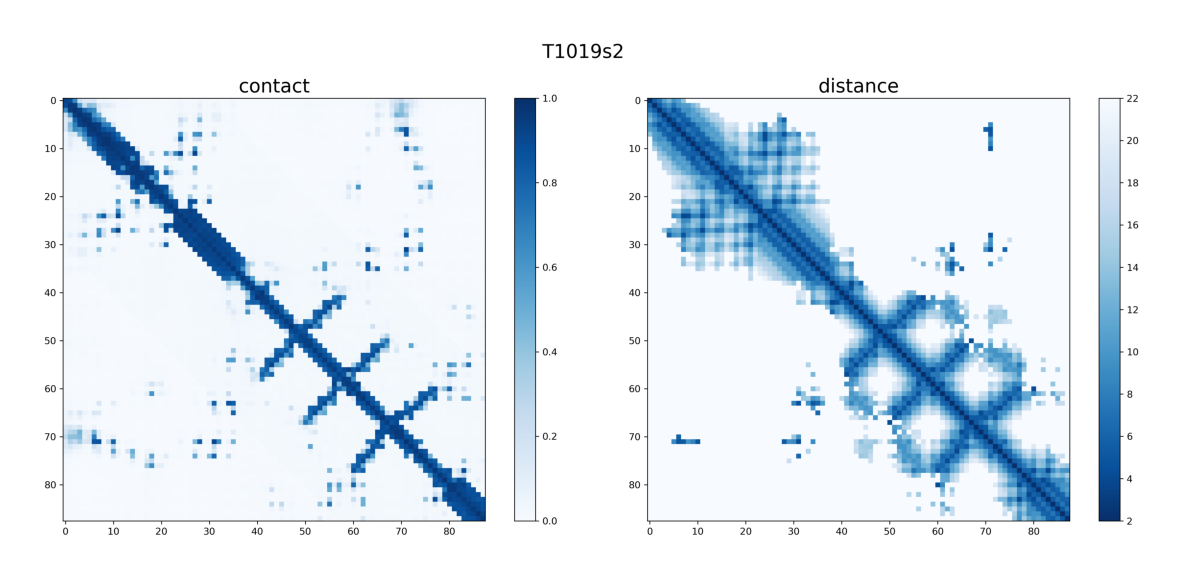

In [38]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

for protein, crops in dataloader:
    m_target = protein.targets.domain_name
if modoEvaluacion:
    file_out = os.path.join(path, 'T1019s2', 'out_jupyter', m_target + '.png')
    plot_contact_map(m_target, [contact_accum, distance_accum], file_out)
else:
    file_in = os.path.join(path, 'T1019s2', 'out_jupyter', m_target + '.png')
    fig, ax = plt.subplots(figsize=(15, 15))
    img = mpimg.imread(file_in)
    ax.imshow(img)
    ax.set_axis_off()